# 넷째 마당. 데이터 가공하기

## 데이터 전처리 - 원하는 형태로 데이터 가공하기

**데이터 전처리(data preprocessing)**: 분석에 적합하게 데이터를 가공하는 작업
* 데이터 가공(data manipulation), 데이터 핸들링(data handling), 데이터 랭글링(data wrangling), 데이터 먼징(data munging)

**데이터 전처리에 사용되는 pandas 패키지 주요 명령**

| 함수          | 기능              |
|---------------|-------------------|
| query()       | 행 추출           |
| df[]          | 열(변수) 추출     |
| sort_values() | 정렬              |
| groupby()     | 집단별로 나누기   |
| agg()         | 통계치 구하기     |
| merge()       | 데이터 합치기(열) |
| concat()      | 데이터 합치기(행) |

## 조건에 맞는 데이터만 추출하기

### 조건에 맞는 데이터만 추출하기

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/data-analytics-101/data/'

In [ ]:
import pandas as pd

exam = pd.read_csv(path + 'exam.csv')
exam

In [ ]:
# exam에서 nclass가 1인 경우만 추출
exam.query('nclass == 1')

In [ ]:
# 2반인 경우만 추출
exam.query('nclass == 2')

In [ ]:
# 1반이 아닌 경우
exam.query('nclass != 1')

In [ ]:
# 3반이 아닌 경우
exam.query('nclass != 3')

### 초과, 미만, 이상, 이하 조건 걸기

In [ ]:
# 수학 점수가 50점을 초과한 경우
exam.query('math > 50')

In [ ]:
# 수학 점수가 50점 미만인 경우
exam.query('math < 50')

In [ ]:
# 영어 점수가 50점 이상인 경우
exam.query('english >= 50')

In [ ]:
# 영어 점수가 80점 이하인 경우
exam.query('english <= 80')

### 여러 조건을 충족하는 행 추출하기

In [ ]:
# 1반이면서 수학 점수가 50 점 이상인 경우
exam.query('nclass == 1 & math >= 50')

In [ ]:
# 2반이면서 영어 점수가 80 점 이상인 경우
exam.query('nclass == 2 & english >= 80')

### 여러 조건 중 하나 이상 충족하는 행 추출하기

In [ ]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

In [ ]:
# 영어 점수가 90점 미만이거나 과학 점수가 50점 미만인 경우
exam.query('english < 90 | science < 50')

### 목록에 해당하는 행 추출하기

In [ ]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == 1 | nclass == 3 | nclass == 5')

In [ ]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass in [1, 3, 5]')

### 추출한 행으로 데이터 만들기

In [ ]:
# 1반 수학 점수 평균 구하기
nclass1 = exam.query('nclass == 1')
nclass1['math'].mean()

In [ ]:
# 2반 수학 점수 평균 구하기
nclass2 = exam.query('nclass == 2')
nclass2['math'].mean()

### 문자 변수를 이용해 조건에 맞는 행 추출하기

In [ ]:
df = pd.DataFrame({'sex'     : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

In [ ]:
df.query('sex == 'F' & country == 'Korea'')

문자 변수를 이용해 조건에 맞는 행을 추출할 때는 `query()`에 `전체조건을 감싸는 따옴표`와 `추출할 문자를 감싸는 따옴표`를 `서로 다른 모양`으로 입력해야 함.

In [ ]:
# 전체 조건에 작은따옴표, 추출할 문자에 큰따옴표 사용
df.query('sex == "F" & country == "Korea"')

In [ ]:
# 전체 조건에 큰따옴표, 추출할 문자에 작은따옴표 사용
df.query("sex == 'M' & country == 'China'")

#### [꿀팁] 외부 변수를 이용해 추출하기

In [ ]:
var = 3
exam.query('nclass == @var')

#### [꿀팁] 파이썬에서 사용하는 연산자

| 논리 연산자 | 기능        |
|:-----------:|-------------|
| <           | 작다        |
| <=          | 작거나 같다 |
| >           | 크다        |
| >=          | 크거나 같다 |
| ==          | 같다        |
| !=          | 같지 않다   |
| \|          | 또는        |
| &           | 그리고      |
| in          | 매칭 확인   |

| 산술 연산자 | 기능            |
|:-----------:|-----------------|
| +           | 더하기          |
| -           | 빼기            |
| *           | 곱하기          |
| **          | 제곱            |
| /           | 나누기          |
| //          | 나눗셈의 몫     |
| %           | 나눗셈의 나머지 |

## 필요한 변수만 추출하기

### 변수 추출하기

In [ ]:
exam['math']  # math 추출

In [ ]:
exam['english']  # english 추출

#### 여러 변수 추출하기



In [ ]:
exam[['nclass', 'math', 'english']]  # nclass, math, english 추출

#### [꿀팁] 변수가 1개 일 때 데이터 프레임 유지하기

변수를 1개만 추출하면 결과가 DataFrame 객체에서 Series 객체로 변환됨. 변수명을 `[ ]`로 한 번 더 감싸면 DataFrame 객체를 유지할 수 있음.

In [ ]:
# 시리즈로 추출
exam['math'] 

In [ ]:
# 데이터 프레임으로 추출
exam[['math']] 

### 변수 제거하기



In [ ]:
exam.drop(columns = 'math')  # math 제거

In [ ]:
exam.drop(columns = ['math', 'english'])  # math, english 제거

### pandas 명령 조합하기

#### `query()`와 `[ ]` 조합하기

In [ ]:
# nclass가 1인 행만 추출한 다음 english 추출
exam.query('nclass == 1')['english']

In [ ]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
exam.query('math >= 50')[['id', 'math']]

#### 일부만 출력하기

In [ ]:
# math가 50 이상인 행만 추출한 다음 id, math 앞부분 5행까지 추출
exam.query('math >= 50')[['id', 'math']].head()

In [ ]:
# math가 50 이상인 행만 추출한 다음 id, math 앞부분 10행까지 추출
exam.query('math >= 50')[['id', 'math']].head(10)

### 가독성 있게 코드 줄 바꾸기

In [ ]:
exam.query('math >= 50') \
    [['id', 'math']] \
    .head(10)

## 순서대로 정렬하기

### 오름차순으로 정렬하기

In [ ]:
exam.sort_values('math')  # math 오름차순 정렬

### 내림차순으로 정렬하기



In [ ]:
exam.sort_values('math', ascending = False)  # math 내림차순 정렬

### 여러 정렬 기준 적용하기

In [ ]:
# nclass, math 오름차순 정렬
exam.sort_values(['nclass', 'math'])

In [ ]:
# nclass 오름차순, math 내림차순 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

## 파생변수 추가하기

### 파생변수 추가하기

In [ ]:
# total 변수 추가
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

#### 여러 파생변수 한 번에 추가하기

In [ ]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],       # total 추가
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)  # mean 추가

### `df.assign()`에 `np.where()` 적용하기

In [ ]:
import numpy as np

exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

### 추가한 변수를 `pandas` 함수에 바로 활용하기


In [ ]:
# total 변수 추가, total 기준 정렬
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total', ascending=False)

### `lambda` 이용해 데이터 프레임명 줄여 쓰기



In [ ]:
# 긴 데이터 프레임명 지정
long_name = pd.read_csv(path + 'exam.csv')

In [ ]:
# long_name 직접 입력
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

In [ ]:
# long_name 대신 x 입력
long_name.assign(new = lambda x: x['math'] + x['english'] + x['science'])

#### 앞에서 만든 변수를 활용해 다시 변수 만들기

In [ ]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = exam['total'] / 3)   

In [ ]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean  = lambda x: x['total'] / 3)    

In [ ]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'], 
            mean  = lambda x: x['total'] / 3)

## 집단별로 요약하기

### 전체 요약 통계량 구하기

```
df.agg(할당할 변수명 = ('사용할 변수명', '사용할 함수명')
```

In [ ]:
# math 평균 구하기
exam.agg(mean_math = ('math', 'mean'))

#### 집단별 요약 통계량 구하기



In [ ]:
# nclass별로 분리해서, math 평균 구하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

#### [꿀팁] 변수를 인덱스로 바꾸지 않기

In [ ]:
exam.groupby('nclass', as_index = False).agg(mean_math = ('math', 'mean'))

#### 여러 요약 통계량 한 번에 구하기



In [ ]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),     
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),          
         n           = ('nclass', 'count'))

### [꿀팁] 모든 변수의 요약 통계량 한 번에 구하기

In [ ]:
exam.groupby('nclass').mean()

**agg()에서 주로 사용하는 요약 통계량 함수**

|함수|통계량|
|-|-|
|mean()|평균|
|std()|표준편차|
|sum()|합계|
|median()|중앙값|
|min()|최솟값|
|max()|최댓값|
|count()|빈도(개수)|

### 집단별로 다시 집단 나누기

groupby()에 여러 변수를 지정하면 집단을 나눈 다음 다시 하위 집단으로 나눌 수 있음.

In [ ]:
mpg = pd.read_csv(path + 'mpg.csv')

In [ ]:
# 제조 회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']) \
   .agg(mean_cty = ('cty', 'mean'))

In [ ]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"') \
   .groupby(['drv']) \
   .agg(n = ('drv', 'count'))

In [ ]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"') \
   .groupby(['drv']) \
   .agg(n = ('drv', 'count'))

#### [꿀팁] `value_counts()`로 집단별 빈도 간단하게 구하기

In [ ]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

In [ ]:
mpg['drv'].value_counts()

In [ ]:
mpg['drv'].value_counts().query('n > 100')

In [ ]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
mpg['drv'].value_counts() \
          .to_frame('n')

In [ ]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv')

In [ ]:
# drv 빈도 구하기
# 데이터 프레임으로 바꾸기, 변수명 n으로 바꾸기
# axis 이름에 drv 지정
# n이 100을 초과한 경우 추출
mpg['drv'].value_counts() \
          .to_frame('n') \
          .rename_axis('drv') \
          .query('n > 100')

### `pandas` 함수 조합하기

Q. 제조사 별로 'suv' 자동차의 도시 및 고속도로 합산 연비 평균을 구해 내림차순으로 정렬하고, 1~5위까지 출력하시오.

In [ ]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head(5)

## 데이터 합치기

### 가로로 합치기
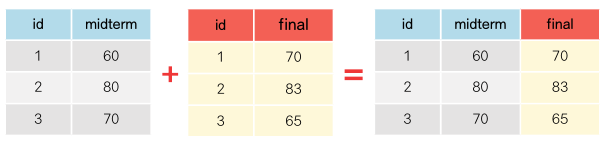

In [ ]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})
test1

In [ ]:
# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})
test2

In [ ]:
# id 기준으로 합쳐서 total에 할당
total = pd.merge(test1, test2, how = 'left', on = 'id')
total

#### 다른 데이터를 활용해 변수 추가하기

In [ ]:
exam

In [ ]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

In [ ]:
# nclass 기준으로 합쳐서 exam_new에 할당
exam_new = pd.merge(exam, name, how = 'left', on = 'nclass')
exam_new

### 세로로 합치기

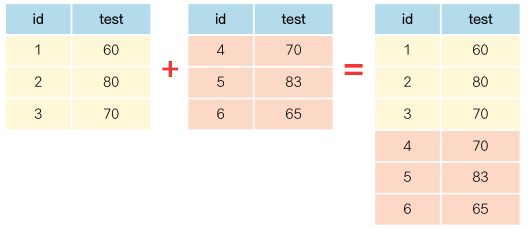

In [ ]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})
group_a

In [ ]:
# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})
group_b

In [ ]:
# 데이터 합쳐서 group_all에 할당
group_all = pd.concat([group_a, group_b])
group_all

### 정리하기

In [ ]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')


## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거


## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()


## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])


## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total') \
    .head()


## 6. 집단별로 요약하기
exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']) \
   .agg(mean_cty = ('cty', 'mean'))


## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기